#### 1. Perform web scraping on the site mechalord7.github.io and retrieve article titles and summaries as displayed on Home page

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the BBC News homepage
url = "https://mechalord7.github.io/"

# Send an HTTP GET request to the URL
response = requests.get(url)

#Check if the request was successful (status code 200) Status codes 204 and 400 indicate page error or page not found
if response.status_code==200:
    print("Request successful")
else:
    print("Request failed")


# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.text, "html.parser")

# Extract titles and summaries
titles = []
summaries=[]

for article in soup.select(".list__item"):
    headline = article.find("h2").text
    summary_elem = article.find_all("p")[1]
    summary = summary_elem.text if summary_elem else "No summary available"
    titles.append(headline)
    summaries.append(summary)

# Transform the extracted data into a Pandas DataFrame
articles={
    "Headline":titles,
    "Summary":summaries
}
articles_df=pd.DataFrame(articles)

# Display the transformed DataFrame
print("\nTransformed DataFrame:")
print(articles_df)

Request successful

Transformed DataFrame:
                           Headline  \
0  \nEssentials? Not the tools!\n\n   
1          \nMotorycling Skills\n\n   
2              \nRide to Bidadi\n\n   
3         \nA Hero Off the Road\n\n   
4            \nThe Urban Hunter\n\n   
5                  \nScram away\n\n   
6                       \nTauro\n\n   
7                      \nSafety\n\n   
8                      \nDreams\n\n   
9               \nRambler Talez\n\n   

                                             Summary  
0             How do you handle different terrain?\n  
1         Did you just think you couldn’t do that?\n  
2                  Need Therapy? - Nah, just ride!\n  
3                The cool guy who excels at sports\n  
4                Playing field: Thick Urban Jungle\n  
5                 A younger sibling for the young?\n  
6                                      First love.\n  
7  Safety on the road. Your responsibilities and ...  
8        What are dreams? and wh

#### 2. Read CSV file "Assignment1.csv" using Pandas. Display first 15 rows of the dataframe. Display the rows where column "Awards" is "1 win" and "5 wins". Identify max and min values in Height column and handle outliers by removing them, then identify rows where Height value is null and impute the missing values.

In [2]:
import pandas as pd

# Read Assignment1 data from CSV file
file_path = "Assignment1.csv"
famous_data = pd.read_csv(file_path)

# Display the first 15 rows of the DataFrame
print("First few rows of the Titanic DataFrame:")
print(famous_data.head(15))


# Filter rows where awards in 1 win and 5 wins
awards_people = famous_data[famous_data["Awards"].isin(["1 win", "5 wins"])]
print("\nAwards of 1 win and 5 wins")
print(awards_people)


# Height min and max calculated
Q1 = famous_data['height in m'].quantile(0.25)
Q3 = famous_data['height in m'].quantile(0.75)
IQR = Q3 - Q1
bada_height = Q3 + 1.5 * IQR
smol_height = Q1 - 1.5 * IQR
print(f"Max height: {bada_height}\nMin height: {smol_height}")


# removing outliers
famous_data = famous_data[~((famous_data['height in m'] < (smol_height)) | (famous_data['height in m'] > (bada_height)))]


# Filling in null values using mean
famous_data['height in m'].fillna((famous_data['height in m'].mean()), inplace=True)
    



First few rows of the Titanic DataFrame:
    Rank               Name  Gender Date_of_birth  height in m  \
0      1      Anya Chalotra  Female    21-07-1995         1.68   
1      2      Hayley Atwell  Female    05-04-1982         1.69   
2      3   Rebecca Ferguson  Female    19-10-1983         1.65   
3      4      Vanessa Kirby  Female    18-04-1988         1.70   
4      5         Tom Cruise    Male    03-07-1962         1.70   
5      6        Freya Allan  Female    06-09-2001         1.65   
6      7    Pom Klementieff  Female    03-05-1986       128.00   
7      8       Ellen Barkin  Female    16-04-1954         1.68   
8      9      Florence Pugh  Female    03-01-1996         1.62   
9     10        Nina Dobrev  Female    09-01-1989         1.70   
10    11     Cillian Murphy    Male    25-05-1976         1.72   
11    12       Henry Cavill    Male    05-05-1983         1.85   
12    13      Margot Robbie  Female    02-07-1990         1.68   
13    14       Jim Caviezel    Male

#### 3. Sort celebs by height in descending order. Calculate age based on Date of Birth and group rows by "Role" and calculate average Age.

In [3]:
famous_data.sort_values(by='height in m', ascending=False, inplace=True)

famous_data['Date_of_birth'] = pd.to_datetime(famous_data['Date_of_birth'], format='%d-%m-%Y')
famous_data['Age'] = (pd.Timestamp('today') - famous_data['Date_of_birth']).dt.days // 365
print(famous_data) # age





    Rank                 Name  Gender Date_of_birth  height in m  \
74    75             Lee Pace    Male    1979-03-25         1.96   
89    90  Alexander Skarsgård    Male    1976-08-25         1.94   
59    60        Josh Hartnett    Male    1978-07-21         1.91   
96    97       John Krasinski    Male    1979-10-20         1.91   
36    37        Angus Sampson    Male    1979-02-12         1.91   
..   ...                  ...     ...           ...          ...   
66    67        MyAnna Buring  Female    1979-09-22         1.57   
22    23       Isabela Merced  Female    2001-07-10         1.55   
58    59         Jenna Ortega  Female    2002-09-27         1.55   
33    34             Liz Katz  Female    1988-07-08         1.52   
72    73        Sophia Lillis  Female    2002-02-13         1.52   

                                             Role  \
74                        ['Actor', 'Soundtrack']   
89              ['Actor', 'Director', 'Producer']   
59                      

In [4]:
import ast

# Convert 'Role' column into actual list
famous_data['Role'] = famous_data['Role'].apply(ast.literal_eval)
# used ast.literal_eval to avoid security risks with just eval


# Explode 'Role' column
exploded_df = famous_data.explode('Role')


average_age_by_role = exploded_df.groupby('Role')['Age'].mean()
print(average_age_by_role)

Role
Actor                               48.742857
Actress                             37.338983
Additional Crew                     44.333333
Camera and Electrical Department    40.000000
Composer                            30.000000
Director                            49.272727
Executive                           48.750000
Music Department                    29.500000
Producer                            44.507463
Production Designer                 85.000000
Soundtrack                          38.766667
Writer                              43.629630
Name: Age, dtype: float64


#### 4. Create a histogram to visualize the distribution of celebrities' ages.

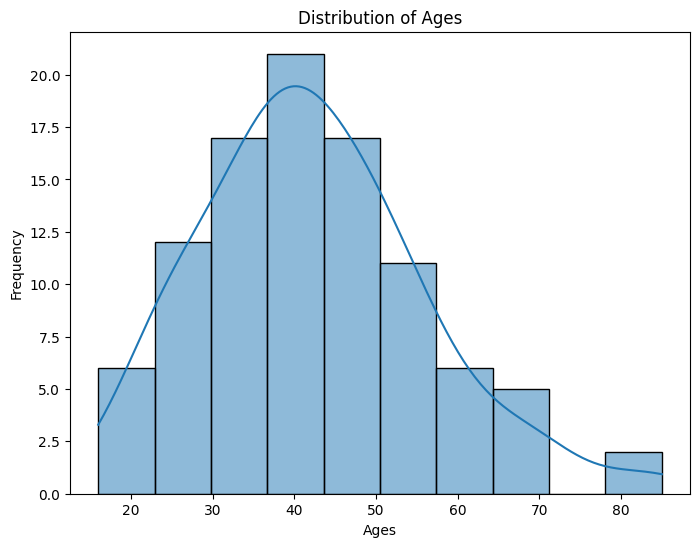

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(famous_data['Age'], bins=10, kde=True)
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Distribution of Ages")
plt.show()

#### 5. Create a box plot to compare the ages of male and female celebrities.

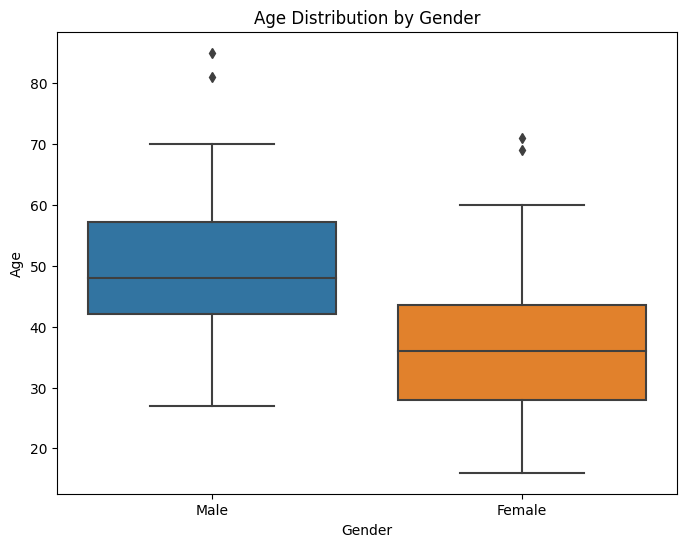

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Age", data=famous_data)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age Distribution by Gender")
plt.show()

#### 6. Create a bar chart to display the count of celebrities by their professions.

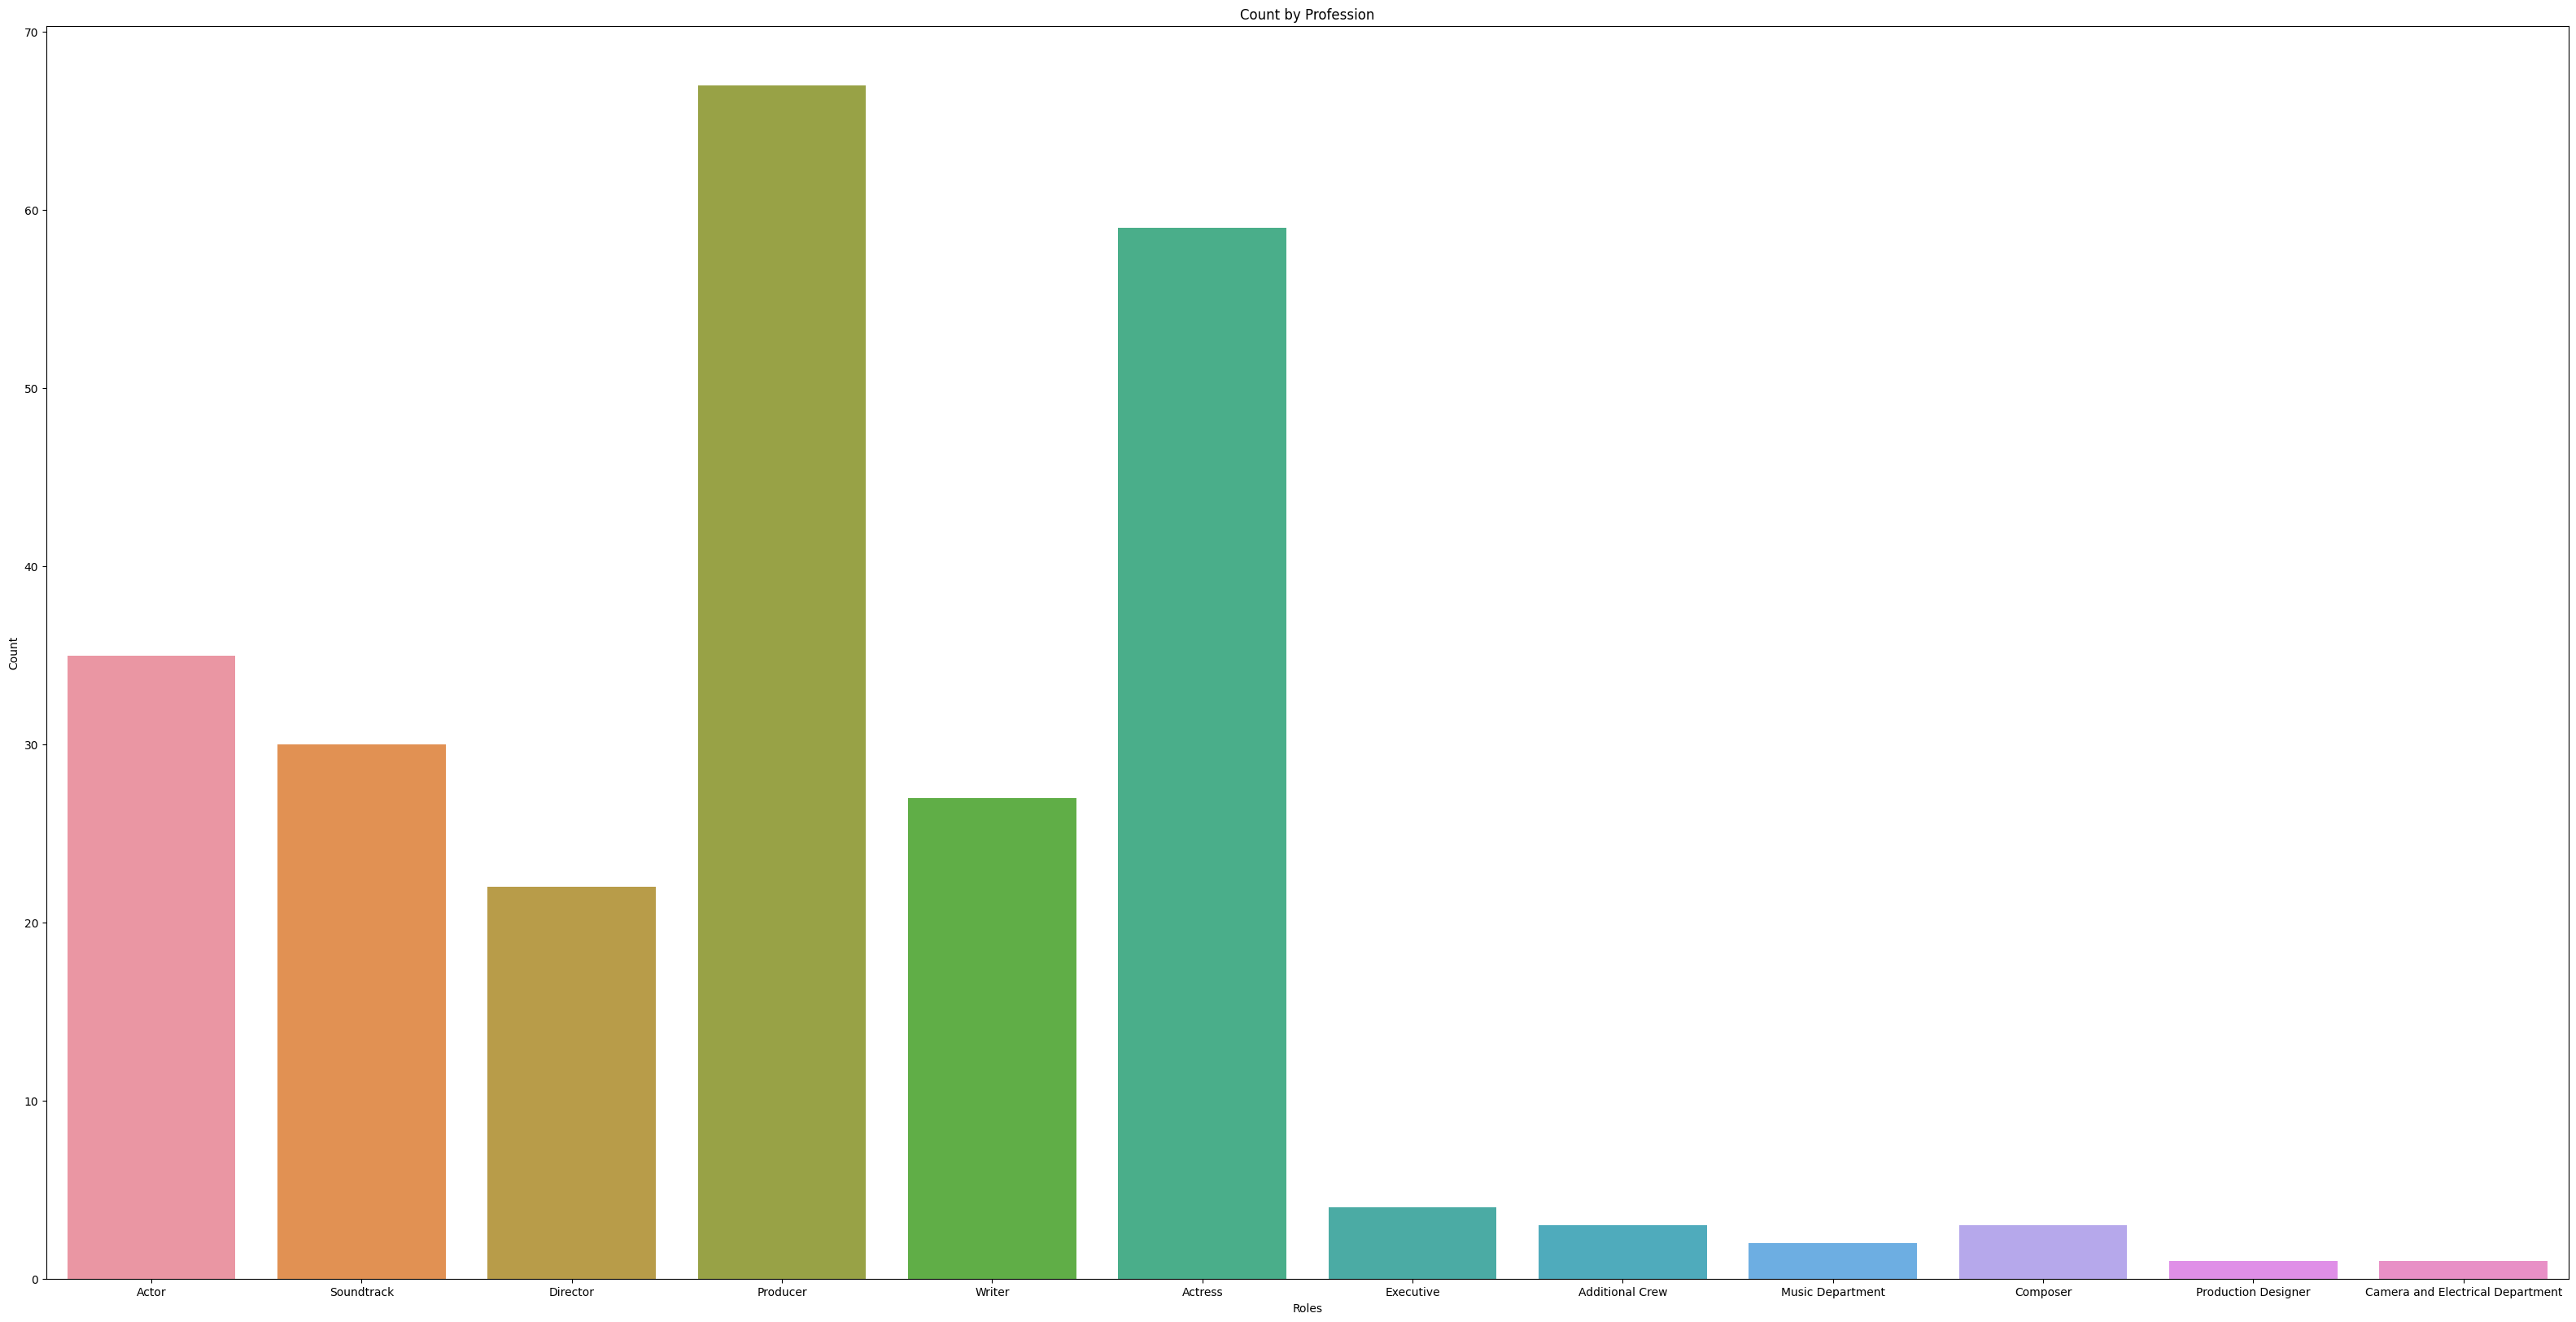

In [7]:
plt.figure(figsize=(40, 20))
sns.countplot(x="Role", data=exploded_df)
plt.xlabel("Roles")
plt.ylabel("Count")
plt.title("Count by Profession")
plt.show()

#### 7. Calculate the correlation matrix between ages, heights, and awards won by celebrities.

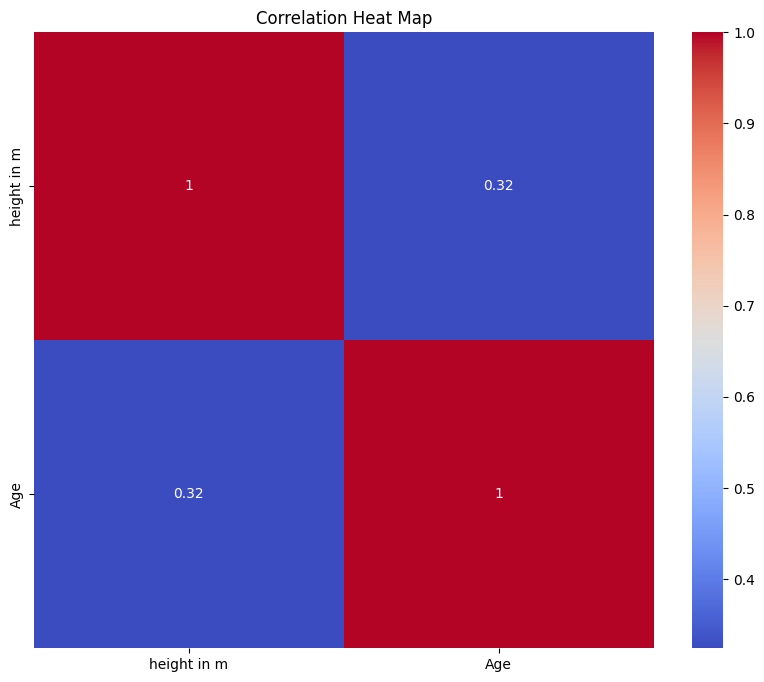

In [8]:
ages_heights_awards_df = famous_data.drop(["Rank","Name","Gender","Date_of_birth","Role","Famous_for","Birth_place"], axis=1)

correlation_matrix = ages_heights_awards_df.corr(numeric_only=True)

# Create a heat map with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map")
plt.show()

#### 8. Identify an apt visualization to plot the trend of celebrities ages over their ranking. Also name one bad visualization.

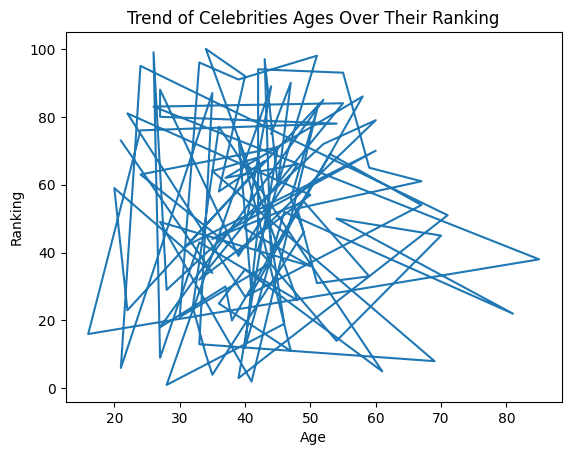

In [9]:
# Trying line plot because I expect to see some correlation:


# Suppose 'ages' and 'rankings' are two lists containing the age and ranking data
ages = famous_data['Age']
rankings = famous_data['Rank']

plt.plot(ages, rankings)
plt.xlabel('Age')
plt.ylabel('Ranking')
plt.title('Trend of Celebrities Ages Over Their Ranking')
plt.show()


What is this gibberish pa
No correlation between age and rank. I was wrong
Let's do scatter plot

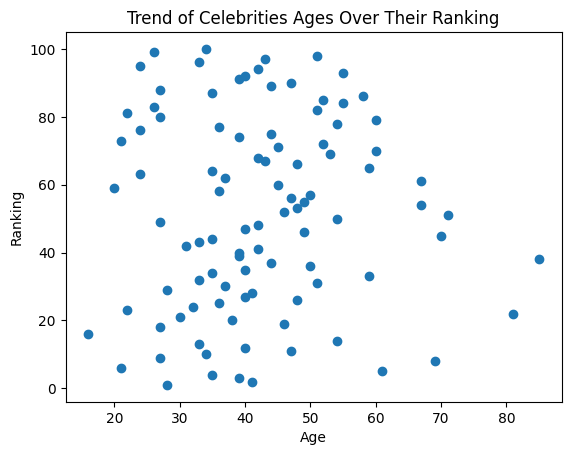

In [10]:
plt.scatter(ages, rankings)

plt.xlabel('Age')
plt.ylabel('Ranking')
plt.title('Trend of Celebrities Ages Over Their Ranking')
plt.show()

ah nice

A line plot was a bad visualisation technique because there was no direct correlation between age and rankings. Scatter plot made is more easier to visualise that there is no relation. There maybe a faint relation that there are less ranks for people below 20 years and people above 60